In [1]:
import numpy as np
import pandas as pd

Entrenar un modelo Lasso con GridSearchCV usando un pipeline de polinomios de segundo grado

Graficar coeficientes "significativos"

Revisar cuantos parámetros son mayores a 1e-2

In [2]:
ipc_path = "ipc.xlsx"

In [3]:
market = pd.read_excel(ipc_path, index_col=0)

In [4]:
market.columns = [c.replace(" MF Equity", "").replace(" INDEX", "") for c in market]

In [5]:
market.head()

,KIMBERA,GAPB,CEMEXCPO,ASURB,GFNORTEO,KOFUBL,AC*,LABB,FEMSAUBD,OMAB,...,MEGACPO,GCC*,BIMBOA,GMEXICOB,GCARSOA1,TLEVICPO,ALFAA,BSMXB,PINFRA*,MEXBOL
DATE,,,,,,,,,,,,,,,,,,,,,
2016-01-01,40.37,152.05,8.72,243.89,94.99,123.90,104.68,13.85,161.63,83.61,...,64.19,44.81,45.95,36.79,70.98,94.34,34.10,30.25,202.73,42977.50
2016-01-04,39.16,148.57,8.43,238.29,91.79,120.29,102.09,14.41,157.62,81.77,...,64.45,43.51,45.02,35.71,69.83,92.62,33.74,29.46,202.93,42113.70
2016-01-05,38.89,147.93,8.31,233.03,91.72,118.82,101.12,13.77,157.80,81.58,...,63.16,43.51,45.77,36.45,70.70,91.89,33.99,29.72,203.56,42041.68
2016-01-06,39.13,146.99,8.29,231.97,91.63,120.32,102.50,13.65,156.37,82.03,...,63.27,43.51,45.97,35.57,70.47,90.41,33.65,29.67,199.80,41691.19
2016-01-07,39.16,141.32,7.64,230.71,89.54,120.20,101.16,13.25,155.14,80.94,...,62.78,42.76,46.18,35.01,68.15,90.23,31.46,28.50,196.75,40661.57


In [6]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
#from sklearn.linear_model import LinearRegression

In [7]:
Rmkt = market.diff().dropna()

In [8]:
Rmkt

,KIMBERA,GAPB,CEMEXCPO,ASURB,GFNORTEO,KOFUBL,AC*,LABB,FEMSAUBD,OMAB,...,MEGACPO,GCC*,BIMBOA,GMEXICOB,GCARSOA1,TLEVICPO,ALFAA,BSMXB,PINFRA*,MEXBOL
DATE,,,,,,,,,,,,,,,,,,,,,
2017-06-08,0.81,-1.15,0.25,-3.80,-1.48,-1.25,-5.88,0.16,-2.01,-0.12,...,-0.16,0.44,0.08,-0.27,0.63,-0.67,0.29,-0.35,-0.77,-187.51
2017-06-09,-0.35,-1.87,0.41,2.63,-0.35,-1.02,-0.79,-0.19,-1.85,0.01,...,0.07,0.64,-0.45,0.31,-1.02,-0.25,-0.13,-0.07,-0.84,-5.73
2017-06-12,0.70,3.14,0.04,-6.78,1.34,-0.10,0.18,-0.27,-0.76,-0.17,...,0.52,-0.24,1.10,-0.66,0.46,0.66,0.13,0.30,1.22,47.03
2017-06-13,-0.48,3.67,-0.11,2.29,0.83,-2.44,2.29,-0.09,-0.05,1.32,...,0.04,-0.20,-0.79,-0.01,-0.51,0.33,-0.14,0.64,3.91,-101.93
2017-06-14,0.53,2.84,0.00,3.84,0.21,0.17,-1.02,0.03,0.50,2.47,...,0.28,-0.06,0.63,0.15,0.99,-0.09,0.04,0.24,3.59,264.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-30,-0.27,-0.99,-0.07,-2.09,-3.92,-0.20,0.69,-0.62,0.36,-2.38,...,0.00,0.99,0.00,-1.89,-0.63,-0.58,0.18,-0.13,-3.54,-604.03
2019-12-31,-1.00,-1.20,-0.08,-0.02,0.65,0.00,-2.65,0.13,-0.60,0.69,...,0.22,-0.67,-0.45,-0.03,0.02,0.14,-0.32,0.11,0.03,-116.46
2020-01-01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [9]:
Xall = Rmkt.drop("MEXBOL", axis=1)
Xall = Xall.join(Rmkt["MEXBOL"].shift(-1)).dropna()

Xtrain = Xall.drop("MEXBOL", axis=1)
ytrain = Xall["MEXBOL"]

In [10]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(Xtrain, ytrain, test_size=0.2, random_state=1643)

In [11]:
ytrain.shape, ytest.shape

((536,), (135,))

In [12]:
from numpy.random import uniform
alpha_list = uniform(0.1, 1, 300)

In [13]:
pipe = Pipeline([
    ("polinomio", PolynomialFeatures(degree=2, include_bias= False)),
    ("model", Lasso())])
params = {
    "model__normalize": alpha_list
}

In [14]:
gcv = GridSearchCV(pipe, params, scoring="r2")
gcv.fit(Xtrain, ytrain)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('polinomio',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=False,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('model',
                                        Lasso(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=1000,
                                              normalize=False, positive=False,
                                              precompute=False,
                                              random_state=None,
                                              selection='cyclic', tol=0.0001,
                                              warm_start=Fal...
       0.1

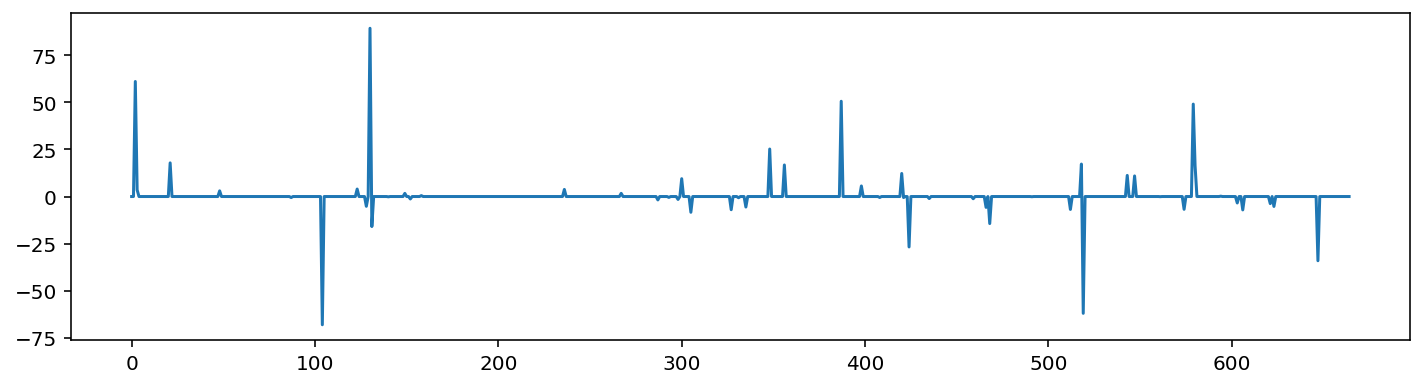

In [15]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = "retina"  
plt.rcParams["figure.figsize"] = (12, 3)
plt.plot(gcv.best_estimator_.named_steps["model"].coef_)

In [16]:
len(gcv.best_estimator_.named_steps["model"].coef_)

665

In [17]:
gcv.best_score_

-0.14915908168151476

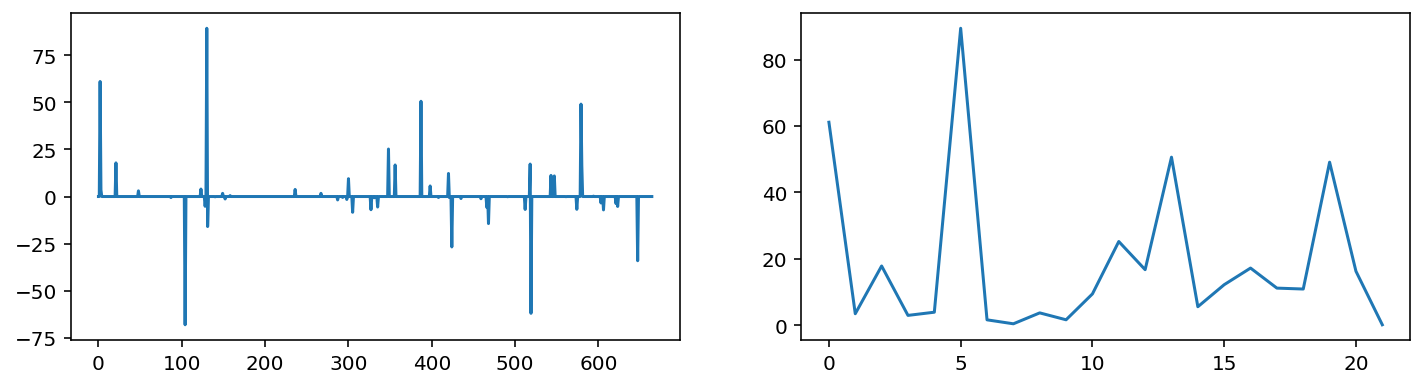

In [18]:
c=[]
cc= gcv.best_estimator_.named_steps.model.coef_
for element in cc:
    if element > 0.01:
        c.append(element)
plt.subplot(1, 2, 1)
plt.plot(cc)
plt.subplot(1, 2, 2)
plt.plot(c)
#plt.show()

# Demostración

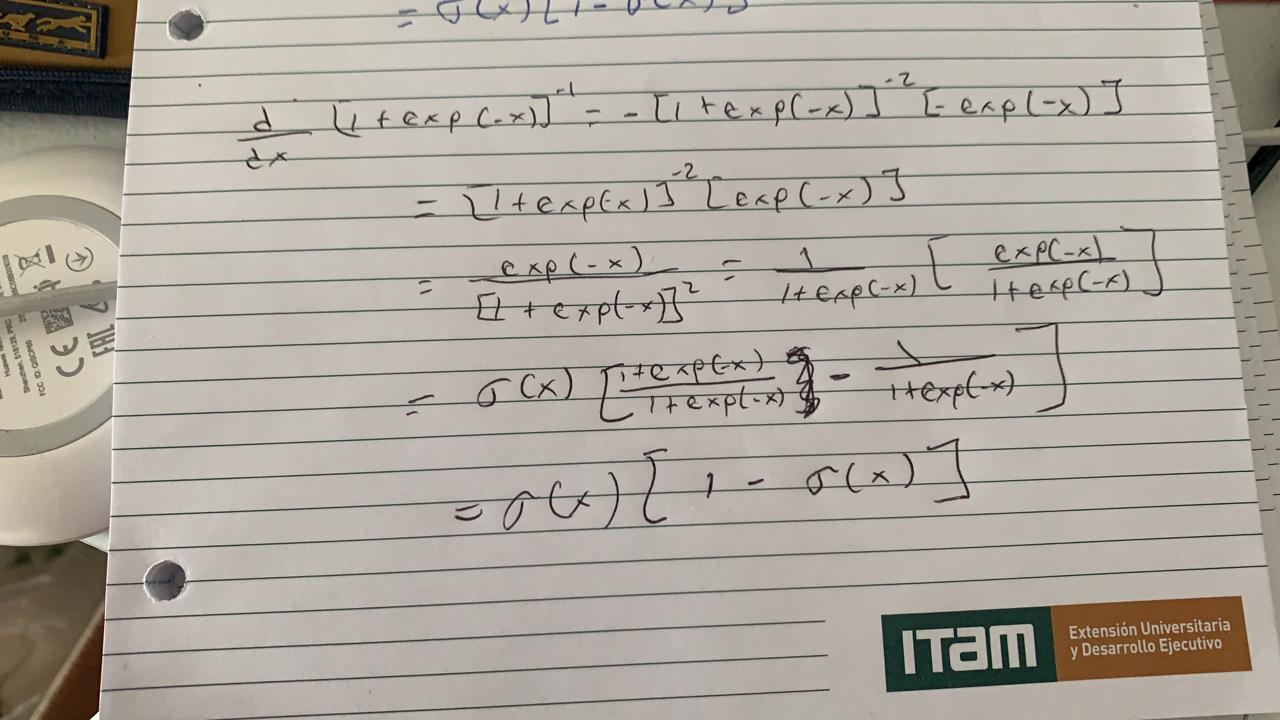

In [19]:
from IPython.display import Image
Image(filename='demostracion.jpeg')

Sea $\sigma(x)= \frac{1}{1+exp(-x)}$, demuestre que $\frac{d}{dx}\sigma(x)= \sigma(x)(1-\sigma(x)).$


$\frac{d}{dx}\sigma(x)=\frac{d}{dx} \frac{1}{1+exp(-x)}= \frac{d}{dx}(1+exp(-x))^{-1}$

$\frac{d}{dx}(1+exp(x))^{-1}= -[1+exp(-x)]^{-2}\cdot[-exp(-x)]$

$-[1+exp(-x)]^{-2}\cdot[-exp(-x)]=\frac{exp(-x)}{1+exp(-x)}$

$\frac{exp(-x)}{1+exp(-x)}=\frac{1}{1+exp(-x)}\left[\frac{exp(-x)}{1+exp(-x)} \right]$

$\frac{1}{1+exp(-x)}\left[\frac{exp(-x)}{1+exp(-x)} \right]= \frac{1}{1+exp(-x)}\left[\frac{1+exp(-x)}{1+exp(-x)}-\frac{1}{1+exp(-x)} \right]$

$\frac{1}{1+exp(-x)}\left[\frac{1+exp(-x)}{1+exp(-x)}-\frac{1}{1+exp(-x)} \right]=\frac{1}{1+exp(-x)}\left[1-\frac{1}{1+exp(-x)} \right]$

$\frac{1}{1+exp(-x)}\left[1-\frac{1}{1+exp(-x)} \right]= \sigma(x) [1-\sigma(x)]$